# The Oscars - (*Jimmy Wrangler - Revisited*)
---
For this assignment, I will re-explore the *311 service request data for Kansas City* that I had explored in the very first assignment of this course. This time, I will use the **Bokeh** visualization library to create a more engaging narrative in exploratory data analysis.


## Data Exploration
---
Lets us first load the python modules that will be needed in this task:

In [335]:
# Render out plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

from bokeh.io import show, output_notebook
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
import math

# Render bokeh plot in the notebook
output_notebook ()

# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')

Loading BokehJS ...

## Load The Dataset
---

In [327]:
df_kc = pd.read_csv ("../data/kc_311_a_a.csv", parse_dates = True, index_col = ['CREATION DATE'])
sdf_kc = df_kc.sort_index ()
sdf_kc.sample (1)

,CASE ID,SOURCE,DEPARTMENT,WORK GROUP,REQUEST TYPE,CATEGORY,TYPE,DETAIL,CREATION TIME,CREATION MONTH,...,ZIP CODE,NEIGHBORHOOD,COUNTY,COUNCIL DISTRICT,POLICE DISTRICT,PARCEL ID NO,LATITUDE,LONGITUDE,CASE URL,30-60-90 Days Open Window
CREATION DATE,,,,,,,,,,,,,,,,,,,,,
2018-07-05,2018088142,PHONE,Public Works,Public Works-Capital Projects-Traffic Signals,Lights / Signals-Traffic Signal-Signal out,Lights / Signals,Traffic Signal,Signal Out,02:47 PM,7,...,64128.0,Palestine East,Jackson,3.0,East,25867.0,39.067332,-94.538585,http://webfusion.kcmo.org/coldfusionapps/Actio...,NaN


## Remove Unnecessary Columns
---

In [328]:
cdf_kc = sdf_kc.drop (['CASE ID', 'SOURCE', 'STREET ADDRESS', 'WORK GROUP', 'REQUEST TYPE', 'TYPE', 'DETAIL', 'COUNCIL DISTRICT', 'POLICE DISTRICT', 'PARCEL ID NO', 'CASE URL', 'EXCEEDED EST TIMEFRAME', 'CREATION MONTH', 'CREATION YEAR', 'CLOSED MONTH', 'CLOSED YEAR', 'ZIP CODE', 'ADDRESS WITH GEOCODE', '30-60-90 Days Open Window'], axis = 1)
cdf_kc.sample (3)

,DEPARTMENT,CATEGORY,CREATION TIME,STATUS,CLOSED DATE,DAYS TO CLOSE,NEIGHBORHOOD,COUNTY,LATITUDE,LONGITUDE
CREATION DATE,,,,,,,,,,
2018-04-19,NHS,Property / Buildings / Construction,10:33 AM,RESOL,04/25/2018,6.0,Fairwood And Robandee,Jackson,38.958737,-94.489207
2018-04-23,NHS,Trash / Recycling,11:40 AM,RESOL,04/25/2018,2.0,Noble And Gregory Ridge,Jackson,38.995581,-94.546188
2018-06-20,NHS,Trash / Recycling,08:20 AM,RESOL,06/20/2018,0.0,St Catherines Gardens,Jackson,38.934364,-94.550276


## Drop NaN Values
---

In [21]:
print '%40s: %s' % ('Dataframe Before Dropping NaN values', cdf_kc.shape)
vdf_kc = cdf_kc.dropna ()
print '%40s: %s' % ('Dataframe After Dropping NaN values', vdf_kc.shape)

    Dataframe Before Dropping NaN values: (62048, 10)
     Dataframe After Dropping NaN values: (51774, 10)


---
# Data Exploration with Bokeh
---

Let me create a visualization for the all the complaint types:

In [329]:
complaint_counts = vdf_kc ['DEPARTMENT'].value_counts ()
df_cc = complaint_counts.to_frame ()
p = figure (x_range = df_cc.index.tolist (), plot_height = 250, plot_width = 950, title="Complaint Count by Department (KC)")
p.vbar (x = df_cc.index, top = df_cc ['DEPARTMENT'], width=0.9, color = Spectral6)
p.xaxis.visible = False
show (p)

maxVal = max (df_cc ['DEPARTMENT'])
radii = [(x * 60.0)/maxVal for x in df_cc ['DEPARTMENT']]
p = figure (x_range = df_cc.index.tolist (), plot_height = 350, plot_width = 950, title="Complaint Count by Department (KC)")
p.circle (x = df_cc.index, y = [5] * len (df_cc.index), size = radii, color = Spectral6)
p.xaxis.major_label_orientation = math.pi/4
p.yaxis.visible = False
show (p)

From the visualization above, it seems that National Highway Service (NHS) in Kansas City receives disproportionaly large number of complaints. Let us look what kind of complaints are received by NHS.

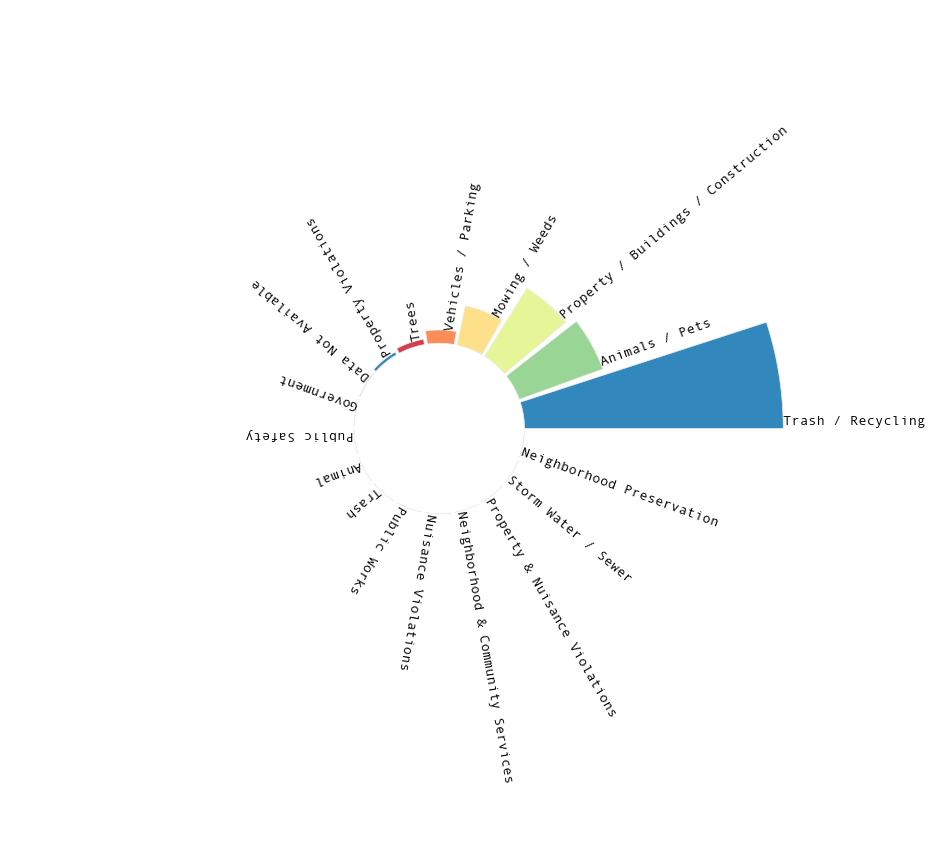

In [336]:
import numpy as np

nhs_df = vdf_kc [vdf_kc ['DEPARTMENT'] == 'NHS']
nhs_cc = nhs_df ['CATEGORY'].value_counts ()
df_ccNhs = nhs_cc.to_frame ()

lObjectsALLcnts = nhs_cc
lObjectsALLlbls = df_ccNhs.index.tolist ()

iN = len(lObjectsALLcnts)
arrCnts = np.array(lObjectsALLcnts)

theta=np.arange(0,2*np.pi,2*np.pi/iN)
width = (2*np.pi)/iN *0.9
bottom = 5000

fig = plt.figure(figsize=(10, 10))
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)
bars = ax.bar(theta, arrCnts, width=width, bottom=bottom, color = Spectral6)

plt.axis('off')

rotations = np.rad2deg(theta)
for x, bar, rotation, label in zip(theta, bars, rotations, lObjectsALLlbls):
    lab = ax.text(x, bottom + bar.get_height(), label, 
             ha = 'left', va = 'bottom', rotation = rotation, rotation_mode = "anchor")   
plt.show()

Most of the complaints received by NHS are related to **Transh / Recycling**.

In [333]:
cByNbh = vdf_kc ['NEIGHBORHOOD'].value_counts ()
df_ccNbh = cByNbh.to_frame ()

maxVal = max (cByNbh [:10])
radii = [(x * 100.0)/maxVal for x in df_ccNbh ['NEIGHBORHOOD'][:10]]
p = figure (y_range = df_ccNbh.index.tolist ()[:10], plot_height = 500, title="Top-10 Problematic Neighborhoods in KC")
p.circle (x = [5] * 10, y = df_ccNbh.index [:10], size = radii, color = Spectral6)
show (p)

From this plot, it is evident that **Shoal Creek** is the most problematic neighborhood in KC w.r.t. the 311 service request data.

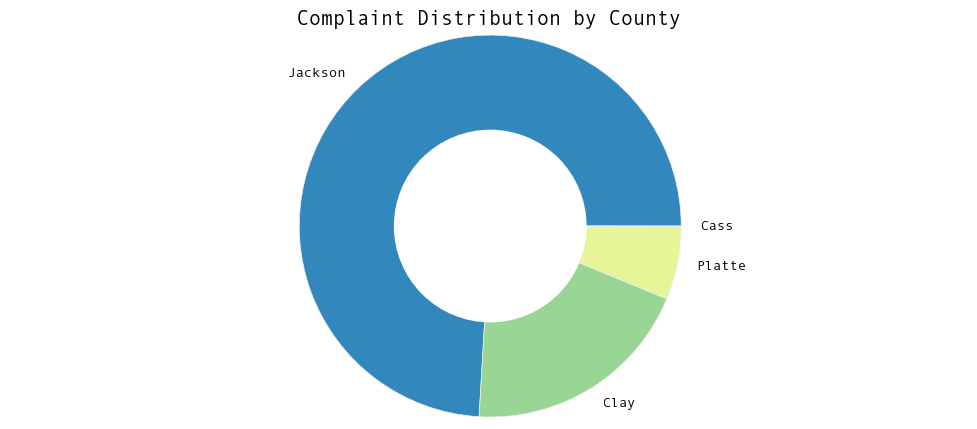

In [345]:
cByCt = vdf_kc ['COUNTY'].value_counts ()
df_ccCt = cByCt.to_frame ()
df_ccCt.iloc [1] += (df_ccCt.iloc [3] + df_ccCt.iloc [5])
df_ccCt.iloc [0] += (df_ccCt.iloc [6])
df_ccCt = df_ccCt.drop (df_ccCt.index [[3, 5, 6]])

figre = plt.figure (figsize = (11, 5))
plt.pie (df_ccCt ['COUNTY'], labels = df_ccCt.index.tolist (), colors = Spectral6, shadow = False)
centre_circle = plt.Circle ((0, 0), 0.5, color = 'white', fc= 'white' , linewidth = 1.25)
fig = plt.gcf ()
fig.gca ().add_artist (centre_circle)

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title ('Complaint Distribution by County', fontweight = 'bold')

plt.show ()

From county-wide statistics, it seems that **Jackson** county requires attention from KC administration.

## Summary
---
In this assignment, I revisited the first assignment (Jimmy Wrangler - Data Explorer) in which I had explored the 311 service request data from Kansas City. This time around, I used the **Bokeh** visualization library to improve the structure of my data exploration and to add in creating compelling visualizations.